In [51]:
using DifferentialEquations, ProgressLogging, Plots

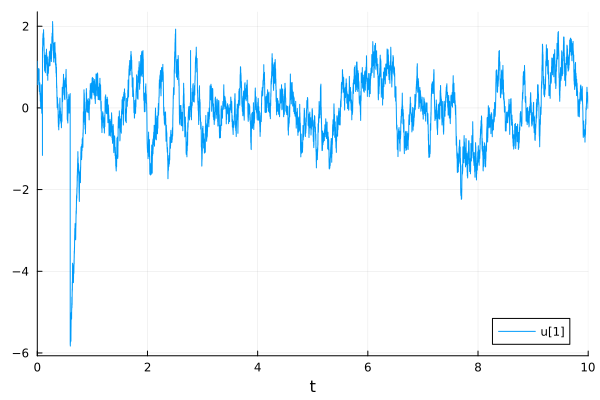

In [76]:
function ou!(du, u, p, t)
    du[1] = -10.0 * u[1]
end

function σ_ou!(du, u, p, t)
    du[1] = 3.0
end

tspan = LinRange(0.0,10.0, 30)

u0 = [1.0]

saved_values = SavedValues(eltype(tspan), Tuple{typeof(u0), typeof(u0)})
function saving_fnc(u, t, integrator)
    return (u, integrator.sol.W.u[end])
end
cb = SavingCallback(saving_fnc, saved_values; saveat=tspan)

prob_ou = SDEProblem(ou!, σ_ou!, [1.0], (0.0, 10.0))
sol = solve(prob_ou; progress=true, callback=cb, save_noise=true)
plot(sol, idxs=(1))

In [5]:
using DiffEqGPU, CUDA, DifferentialEquations

In [30]:
function lorenz(du, u, p, t)
    du[1] = p[1] * (u[2] - u[1])
    du[2] = u[1] * (p[2] - u[3]) - u[2]
    du[3] = u[1] * u[2] - p[3] * u[3]
end

u0 = Float32[1.0;0.0;0.0]
tspan = (0.0f0,100.0f0)
p = [10.0f0,28.0f0,8/3f0]
prob = ODEProblem(lorenz,u0,tspan,p)
prob_func = (prob,i,repeat) -> remake(prob,p=rand(Float32,3).*p)
monteprob = EnsembleProblem(prob, prob_func = prob_func, safetycopy=false)
sol = solve(monteprob,Tsit5(),EnsembleGPUArray(CUDA.device()),trajectories=10_000,saveat=1.0f0);

In [31]:
function lorenz(du, u, p, t)
    du[1] = p[1] * (u[2] - u[1])
    du[2] = u[1] * (p[2] - u[3]) - u[2]
    du[3] = u[1] * u[2] - p[3] * u[3]
end

u0 = Float32[1.0;0.0;0.0]
tspan = (0.0f0,100.0f0)
p = [10.0f0,28.0f0,8/3f0]
prob = ODEProblem(lorenz,u0,tspan,p)
prob_func = (prob,i,repeat) -> remake(prob,p=rand(Float32,3).*p)
monteprob = EnsembleProblem(prob, prob_func = prob_func, safetycopy=false)
sol = solve(monteprob,Tsit5(),EnsembleCPUArray(),trajectories=10_000,saveat=1.0f0);

In [26]:
sol

EnsembleSolution Solution of length 10000 with uType:
ODESolution{Float32, 2, Vector{SubArray{Float32, 1, Matrix{Float32}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}}, Nothing, Nothing, Vector{Float32}, Nothing, ODEProblem{Vector{Float32}, Tuple{Float32, Float32}, true, Vector{Float32}, ODEFunction{true, SciMLBase.FullSpecialize, typeof(lorenz), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, @NamedTuple{}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, SciMLBase.LinearInterpolation{Vector{Float32}, Vector{SubArray{Float32, 1, Matrix{Float32}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}}}, SciMLBase.DEStats, Nothing, Nothing, Nothing}

In [24]:
CUDA.device()

CuDevice(0): NVIDIA GeForce RTX 2080

In [27]:
CUDA.CUDABackend()

CUDABackend(false, false)